In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
title_font = {'family':'arial','color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family':'arial','color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
telco_churn_df=pd.read_csv('C:/Users/Hp/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco_churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
for i in range(len(telco_churn_df)):
    if ((type(telco_churn_df['TotalCharges'][i])==str) & (telco_churn_df['TotalCharges'][i]==' ')):
        telco_churn_df['TotalCharges'][i]=float(0)
    else:    
        telco_churn_df['TotalCharges'][i]=float(telco_churn_df['TotalCharges'][i])

In [6]:
telco_churn_df['TotalCharges'] = telco_churn_df['TotalCharges'].astype("float")

In [7]:
telco_churn_df.isnull().sum()*100/telco_churn_df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [141]:
telco_churn_df["TotalCharges"].dtype

dtype('float64')

In [9]:
i=0
for col in telco_churn_df.columns:
    if col != 'customerID':
        if telco_churn_df[col].dtype==object:
            print(col)
            col=telco_churn_df[col].unique()
            print(col)
            i+=1
print(i)     

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']
16


Up to here, I corrected one value from TotalCharges, they were str type and I made them float as they should be. Now that i have mostly object type data, i will apply label encoding to them.

In [10]:
labelencoder=LabelEncoder()
telco_churn_df["Churn"]=labelencoder.fit_transform(telco_churn_df["Churn"])
telco_churn_df["gender"]=labelencoder.fit_transform(telco_churn_df["gender"])
telco_churn_df["Partner"]=labelencoder.fit_transform(telco_churn_df["Partner"])
telco_churn_df["Dependents"]=labelencoder.fit_transform(telco_churn_df["Dependents"])
telco_churn_df["PhoneService"]=labelencoder.fit_transform(telco_churn_df["PhoneService"])
telco_churn_df["MultipleLines"]=labelencoder.fit_transform(telco_churn_df["MultipleLines"])
telco_churn_df["InternetService"]=labelencoder.fit_transform(telco_churn_df["InternetService"])
telco_churn_df["OnlineSecurity"]=labelencoder.fit_transform(telco_churn_df["OnlineSecurity"])
telco_churn_df["OnlineBackup"]=labelencoder.fit_transform(telco_churn_df["OnlineBackup"])
telco_churn_df["DeviceProtection"]=labelencoder.fit_transform(telco_churn_df["DeviceProtection"])
telco_churn_df["TechSupport"]=labelencoder.fit_transform(telco_churn_df["TechSupport"])
telco_churn_df["StreamingTV"]=labelencoder.fit_transform(telco_churn_df["StreamingTV"])
telco_churn_df["StreamingMovies"]=labelencoder.fit_transform(telco_churn_df["StreamingMovies"])
telco_churn_df["Contract"]=labelencoder.fit_transform(telco_churn_df["Contract"])
telco_churn_df["PaperlessBilling"]=labelencoder.fit_transform(telco_churn_df["PaperlessBilling"])
telco_churn_df["PaymentMethod"]=labelencoder.fit_transform(telco_churn_df["PaymentMethod"])
telco_churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


Since i have 21 columns, i will apply PCA to eliminate some of them.

In [11]:
telco_df=telco_churn_df.select_dtypes(exclude='object')

In [12]:
X=telco_df.values

In [13]:
len(telco_df.columns)

20

In [14]:
X=StandardScaler().fit_transform(telco_df)
pca=PCA(n_components=20)
principalComponents=pca.fit_transform(X)

In [15]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.21658532 0.12595918 0.07507976 0.06120827 0.05473147 0.05014983
 0.04726797 0.04315032 0.04059246 0.03894386 0.03631093 0.03526085
 0.03430787 0.03332412 0.02817055 0.02752162 0.02334556 0.01590137
 0.00953513 0.00265356]
[ 21.66  34.26  41.77  47.89  53.36  58.37  63.1   67.42  71.48  75.37
  79.    82.53  85.96  89.29  92.11  94.86  97.19  98.78  99.73 100.  ]


Text(0, 0.5, '% of Variance Explained')

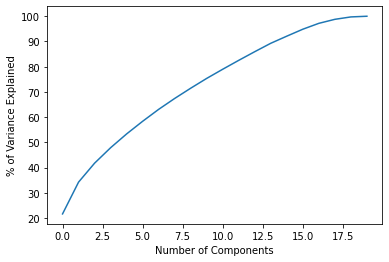

In [16]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

In [142]:
X = StandardScaler().fit_transform(telco_df)
pca = PCA(n_components=6)
principalComponents=pca.fit_transform(X)

In [143]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.21658532 0.12595897 0.07507924 0.06120044 0.05471682 0.04982776]
[21.66 34.26 41.77 47.89 53.36 58.34]


Text(0, 0.5, '% of Variance Explained')

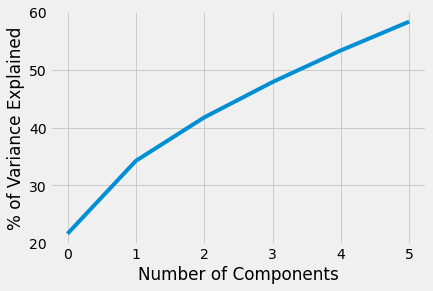

In [144]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

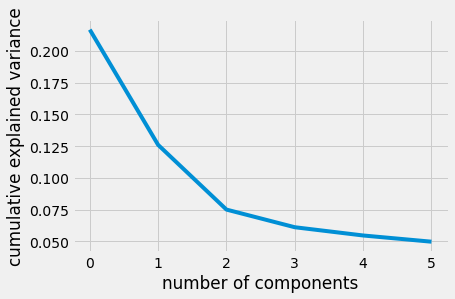

In [145]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

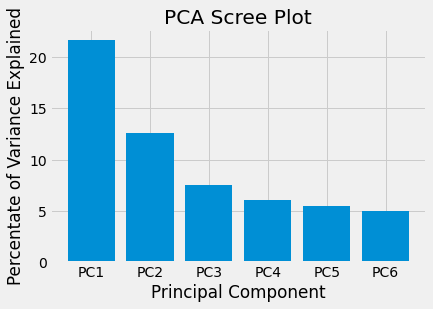

In [146]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6']
plt.bar(x= range(1,7), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [147]:
X = pd.DataFrame(X, columns=telco_df.columns)

In [148]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

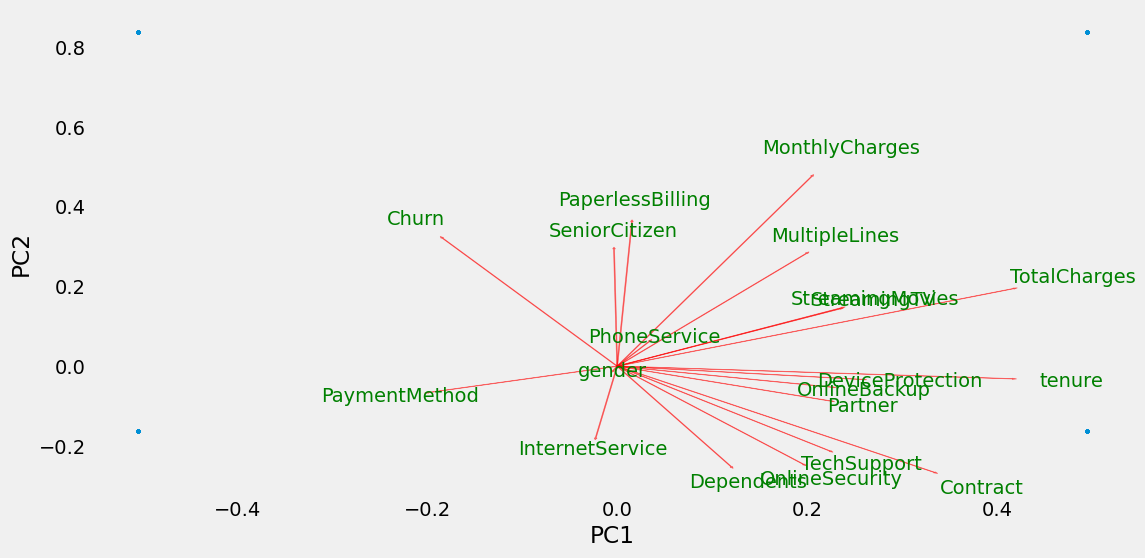

In [149]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

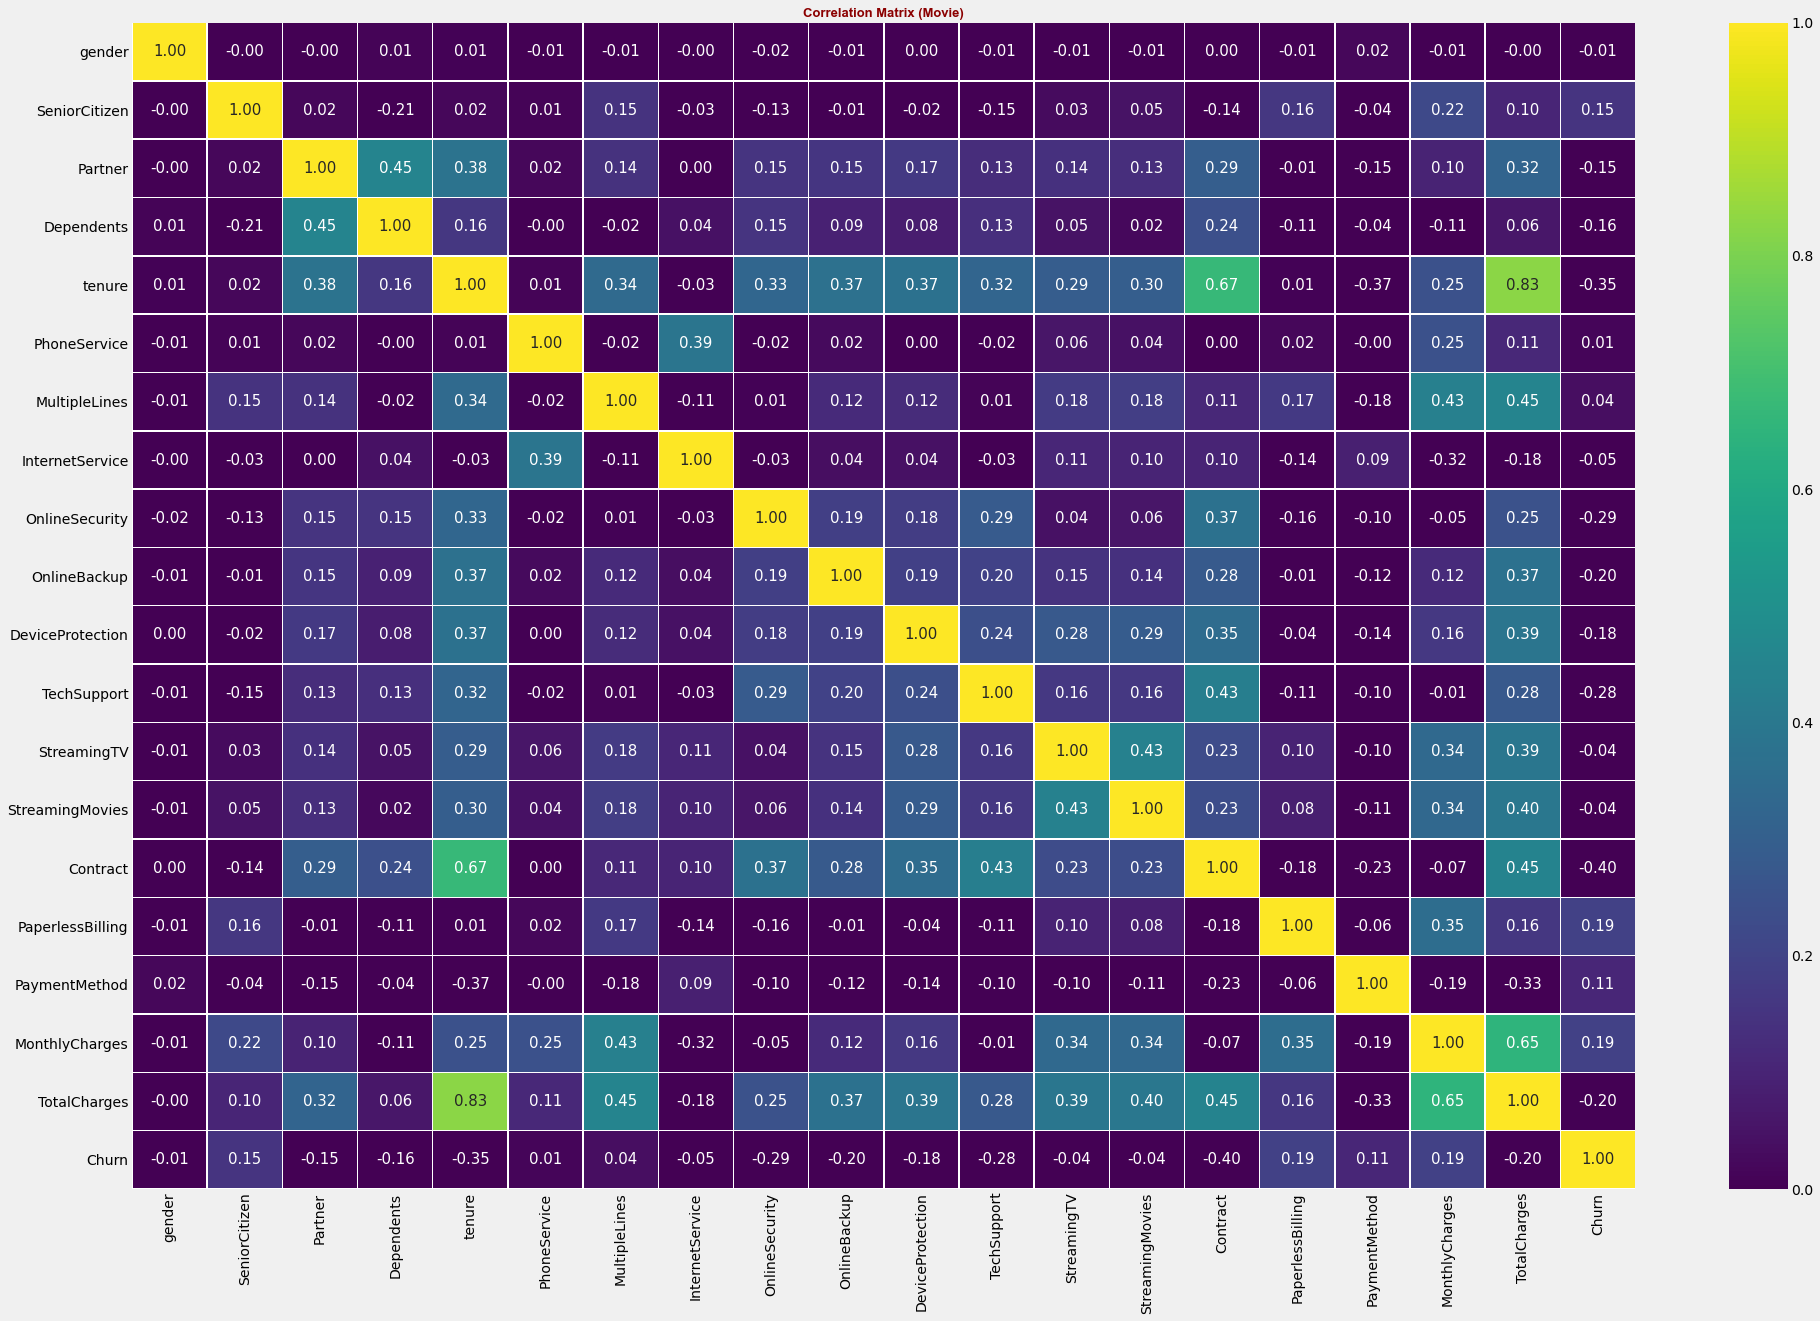

In [150]:
plt.figure(figsize=(30,20))
sns.heatmap(telco_churn_df.corr(), annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)", fontdict=title_font)

plt.show()

In [26]:
telco_churn_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [27]:
x=telco_churn_df[["DeviceProtection","TechSupport","OnlineSecurity","TotalCharges","MultipleLines","tenure","Contract"]]
y=telco_churn_df["Churn"]

In [28]:
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")

In [75]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.20, random_state=111)

In [76]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [77]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

train_prediction=log_reg_mnm.predict(X_train)
test_prediction=log_reg_mnm.predict(X_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.79
Accuracy on Test Data  : 0.81


In [78]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.788605,0.810504
1,0.010,0.789492,0.811923
2,0.100,0.787007,0.810504
3,1.000,0.787717,0.810504
4,10.000,0.787717,0.809794
5,100.000,0.788072,0.811214
6,1000.000,0.787717,0.809794


In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train=confusion_matrix(y_train,train_prediction)
confusion_matrix_test=confusion_matrix(y_test,test_prediction)

In [80]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[3620  484]
 [ 712  818]]


Confusion Matrix (Test Data)
------------------------------
[[950 120]
 [147 192]]


In [81]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 950
True positive amount  : 192
False positive amount : 120
False negative amount : 147


In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [83]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.8878504672897196


In [84]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.5898617511520737
f1_score() value     :  0.5898617511520737


In [85]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1070
           1       0.62      0.57      0.59       339

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.81      0.81      0.81      1409

f1_score() value        : 0.59
recall_score() value    : 0.57
precision_score() value : 0.62


Precision  : [0.86599818 0.61538462]
Recall     : [0.88785047 0.56637168]
F1 Score   : [0.87678819 0.58986175]


Fraudulent shopping ratio : %26.54
Normal shopping ratio     : %73.46


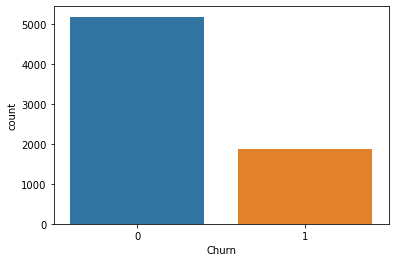

In [86]:
sns.countplot(telco_churn_df.Churn)

print("Fraudulent shopping ratio : %{:.2f}".format(sum(telco_churn_df.Churn)/len(telco_churn_df.Churn)*100))
print("Normal shopping ratio     : %{:.2f}".format((len(telco_churn_df.Churn)-sum(telco_churn_df.Churn))/len(telco_churn_df.Churn)*100))

It can be seen that our data is imbalanced. So we need to use different methods.

In [87]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    
    return  None

In [88]:
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']

create_model(X,y)

Accuracy : 0.8119233498935415

Train Dataset
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4139
           1       0.65      0.56      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634

Test Dataset
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [89]:
from sklearn.utils import resample

In [90]:
normal_shopping = telco_df[telco_df.Churn == 0]
fraudulent_shopping = telco_df[telco_df.Churn == 1]

fraudulent_shopping_upsampled = resample(fraudulent_shopping,
                                         replace = True,
                                         n_samples = len(normal_shopping),
                                         random_state = 111)

upsampled_telco_df = pd.concat([normal_shopping, fraudulent_shopping_upsampled])
upsampled_telco_df.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [91]:
X = upsampled_telco_df.drop('Churn', axis=1)
y = upsampled_telco_df['Churn']

create_model(X,y)

Accuracy : 0.7545893719806763

Train Dataset
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4139
           1       0.74      0.80      0.77      4139

    accuracy                           0.76      8278
   macro avg       0.76      0.76      0.76      8278
weighted avg       0.76      0.76      0.76      8278

Test Dataset
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1035
           1       0.74      0.79      0.76      1035

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



In [92]:
normal_shopping = telco_df[telco_df.Churn == 0]
fraudulent_shopping = telco_df[telco_df.Churn == 1]

fraudulent_shopping_downsampled = resample(normal_shopping,
                                         replace = True,
                                         n_samples = len(fraudulent_shopping),
                                         random_state = 111)

downsampled_telco_df = pd.concat([fraudulent_shopping, fraudulent_shopping_downsampled])
downsampled_telco_df.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [93]:
X = downsampled_telco_df.drop('Churn', axis=1)
y = downsampled_telco_df['Churn']

create_model(X,y)

Accuracy : 0.7566844919786097

Train Dataset
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1495
           1       0.73      0.81      0.77      1495

    accuracy                           0.76      2990
   macro avg       0.76      0.76      0.75      2990
weighted avg       0.76      0.76      0.75      2990

Test Dataset
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       374
           1       0.75      0.76      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [62]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
from imblearn.over_sampling import SMOTE

y = telco_df.Churn
X = telco_df.drop('Churn', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)

In [118]:
create_model(X_smote, y_smote)

Accuracy : 0.7942028985507247

Train Dataset
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4139
           1       0.78      0.83      0.80      4139

    accuracy                           0.80      8278
   macro avg       0.80      0.80      0.80      8278
weighted avg       0.80      0.80      0.80      8278

Test Dataset
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1035
           1       0.78      0.82      0.80      1035

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [96]:
from imblearn.over_sampling import ADASYN

In [97]:
y = telco_df.Churn
X = telco_df.drop('Churn', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X, y)

In [98]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.7862632084534101

Train Dataset
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      4139
           1       0.77      0.81      0.79      4185

    accuracy                           0.78      8324
   macro avg       0.78      0.78      0.78      8324
weighted avg       0.78      0.78      0.78      8324

Test Dataset
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1035
           1       0.77      0.82      0.79      1047

    accuracy                           0.79      2082
   macro avg       0.79      0.79      0.79      2082
weighted avg       0.79      0.79      0.79      2082



It seems that SMOTE algorithm is more successful than up-sampling or down-sampling or ADASYN.

In [130]:
X=X_smote
y=y_smote

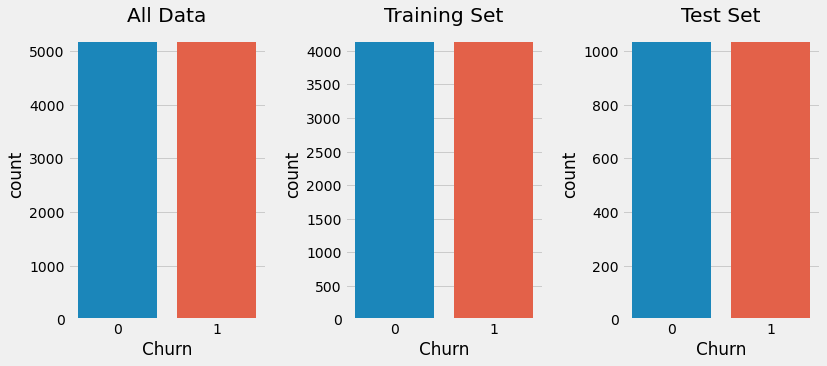

Proportion of '0' in all data     : %50 
Proportion of '0' in training set : %50 
Proportion of '0' in test set     : %50 


In [131]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

Proportion of '0' in all data     : %50 
Proportion of '0' in training set : %50 
Proportion of '0' in test set     : %50 


In [133]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.785024154589372

In [134]:
from sklearn.model_selection import cross_validate, cross_val_score

In [135]:
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.80124557 0.79909804 0.80468163 0.79995705 0.79791689 0.79716525
 0.79705788 0.79566198 0.79546919 0.789242  ]
--------------------------------------------------
Test Scores     :
[0.76811594 0.75748792 0.73043478 0.78067633 0.81932367 0.8115942
 0.81449275 0.81835749 0.83075435 0.82978723]


In [136]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.7977495467498394
Mean score of test set  :  0.7961024677860941


In [137]:
cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2']
                   )

In [138]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.80  
Train Set Mean R-square  : 0.19  
Train Set Mean Precision : 0.78

Test Set Mean Accuracy   : 0.80  
Test Set Mean R-square   : 0.18  
Test Set Mean Precision  : 0.78  


In [139]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')

Model Scores : 
[0.76811594 0.75748792 0.73043478 0.78067633 0.81932367 0.8115942
 0.81449275 0.81835749 0.83075435 0.82978723]
